## Analyze_e1

Example for the MAXM05 course

(Sverker Werin)

In [0]:
!pip install accelerator-toolbox # only for Google Colab

import at
import numpy as np
import matplotlib.pyplot as plt

     |████████████████████████████████| 655kB 4.8MB/s 


Define the lattice elements.

In [0]:
# Straight Section definitions
D      =    at.elements.Drift('D', 1.5  );

# Quadrupoles 
QF     =    at.elements.Quadrupole('QF'  , 0.2, 0.30000);

Define the lattice.

In [0]:
L = [ D ]
L1 = 5*L
lattice =  [D,D,D, QF]+ L1 
print(lattice)

[Drift('D', 1.5), Drift('D', 1.5), Drift('D', 1.5), Quadrupole('QF', 0.2, 0.3), Drift('D', 1.5), Drift('D', 1.5), Drift('D', 1.5), Drift('D', 1.5), Drift('D', 1.5)]


Define a particle X [x, xp, y ,yp, dp, s]

In [0]:
X0=np.zeros((6,1))
X0[0]=0.001 # x
X0[1]=0.0 # xp

Track through the lattice

In [0]:
# Find reference points for output. One for each element.
length = np.size(lattice)
refpts = np.r_[0:length + 1]

In [0]:
# Track the particle in X0 through the lattice.
X_out = at.lattice_pass(lattice, X0, nturns=1,refpts=refpts)

Get the longitudinal position of each element exit.

In [0]:
s = at.lattice.get_s_pos(lattice)

Plot the particle position along the lattice

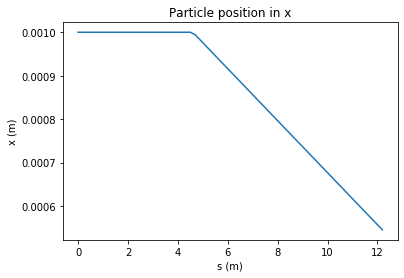

In [0]:
plt.plot(s,X_out[0,0,:,0])
axes = plt.gca()
axes.set_xlabel('s (m)')
axes.set_ylabel('x (m)')
axes.set_title('Particle position in x')
plt.show()

Plot the angle of particle path along lattice.

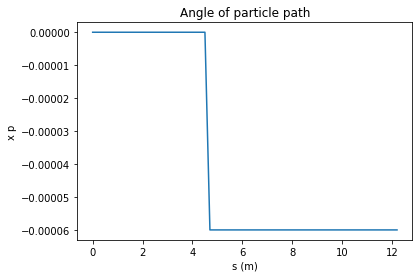

In [0]:
plt.plot(s,X_out[1,0,:,0])
axes = plt.gca()
axes.set_xlabel('s (m)')
axes.set_ylabel('x p')
axes.set_title('Angle of particle path')
plt.show()

Calculate transfer matrices of different elements

In [0]:
element=0
m66=at.find_elem_m66(lattice[element])

print('Transfer matrix of element',element,' = ')
print (m66)

element=3
m66=at.find_elem_m66(lattice[element])


print('Transfer matrix of element',element,' = ')
print (m66)


Transfer matrix of element 0  = 
[[1.  1.5 0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  1.  1.5 0.  0. ]
 [0.  0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0.  1. ]]
Transfer matrix of element 3  = 
[[ 0.994006    0.19960024  0.          0.          0.          0.        ]
 [-0.05988007  0.994006    0.          0.          0.          0.        ]
 [ 0.          0.          1.006006    0.20040024  0.          0.        ]
 [ 0.          0.          0.06012007  1.006006    0.          0.        ]
 [ 0.          0.          0.          0.          1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]]


Calculate the transfer matrix of the complete lattice 

In [0]:
a=at.find_m44(lattice,0)
print(a[0])

[[ 0.54490546 10.10671978  0.          0.        ]
 [-0.05988007  0.72454567  0.          0.        ]
 [ 0.          0.          1.45690654 14.3015247 ]
 [ 0.          0.          0.06012007  1.27654633]]
